In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("ProjectTweets.csv")

In [6]:
df.head()

,no,ids,date,flag,user,text
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
len(df["_TheSpecialOne_"].unique())

659775

In [7]:
len(df["_TheSpecialOne_"])

1599999

In [18]:
df["_TheSpecialOne_"].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
iheartrobpattz       1
67trinity            1
Sibby                1
mAnyA_15             1
bpbabe               1
Name: _TheSpecialOne_, Length: 659775, dtype: int64

In [14]:
freq_counts = df["_TheSpecialOne_"].value_counts()

In [18]:
import matplotlib.pyplot as plt

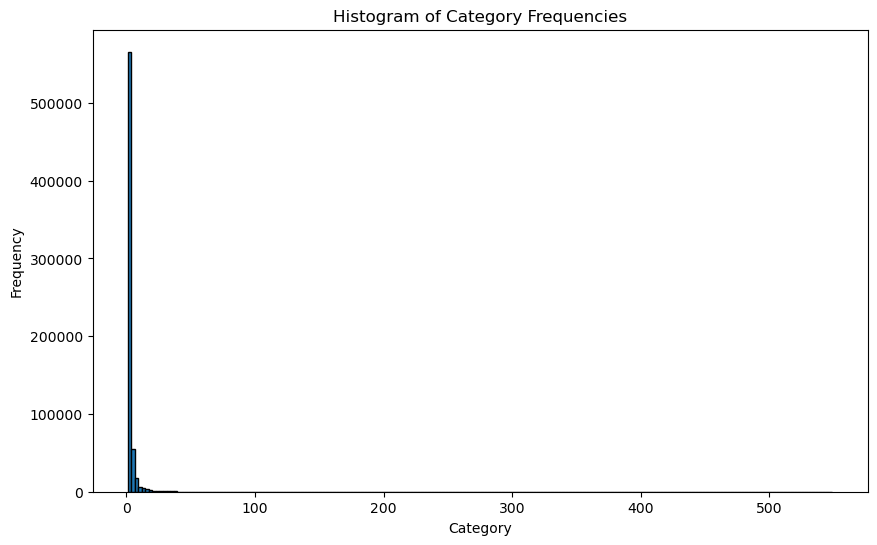

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(freq_counts, bins=200, edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Category Frequencies')
plt.show()

In [19]:
mult = [y for y in freq_counts if y > 1]

In [20]:
mult

[549,
 345,
 310,
 281,
 279,
 276,
 248,
 246,
 238,
 236,
 227,
 225,
 219,
 216,
 213,
 212,
 211,
 211,
 207,
 205,
 202,
 195,
 192,
 189,
 182,
 182,
 182,
 180,
 180,
 179,
 179,
 178,
 178,
 177,
 171,
 171,
 170,
 166,
 166,
 163,
 160,
 159,
 159,
 159,
 158,
 158,
 155,
 152,
 152,
 151,
 151,
 151,
 150,
 150,
 150,
 147,
 146,
 144,
 144,
 143,
 141,
 141,
 141,
 140,
 137,
 137,
 135,
 135,
 135,
 135,
 134,
 133,
 131,
 131,
 131,
 131,
 130,
 130,
 130,
 130,
 129,
 129,
 128,
 127,
 127,
 127,
 127,
 125,
 123,
 123,
 123,
 122,
 122,
 122,
 122,
 122,
 121,
 121,
 120,
 120,
 120,
 120,
 119,
 118,
 118,
 117,
 117,
 117,
 117,
 117,
 116,
 116,
 115,
 115,
 114,
 114,
 114,
 114,
 113,
 113,
 113,
 113,
 113,
 113,
 112,
 112,
 112,
 111,
 110,
 109,
 109,
 109,
 109,
 109,
 108,
 107,
 107,
 106,
 106,
 106,
 105,
 105,
 105,
 105,
 104,
 104,
 104,
 104,
 104,
 104,
 103,
 103,
 103,
 102,
 102,
 101,
 101,
 101,
 101,
 101,
 101,
 100,
 100,
 99,
 99,
 99,
 99,
 9

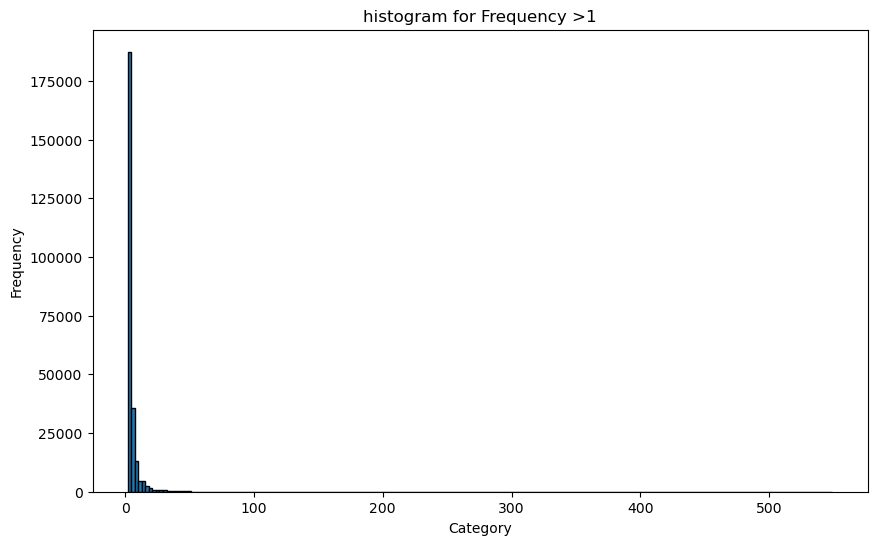

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(mult, bins=200, edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('histogram for Frequency >1')
plt.show()

In [22]:
mult10 = [y for y in freq_counts if y > 10]

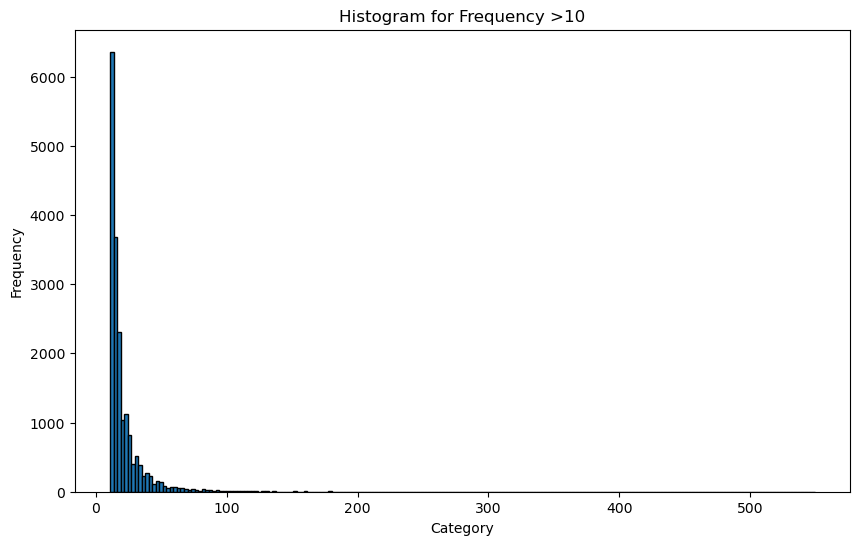

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(mult10, bins=200, edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram for Frequency >10')
plt.show()

clearly a lot of 1s, less 2s, less 3s and so on(mostly). how can I then extract valuable info from the people who contribute the most to the tweets.
possibly, I could go though the entire dataset and sentiment analysis various people? maybe look for a few pareto distributions. I don't really have any idea how this data was selected. This may or may not give me a clue.(It seems arbitrarily subselected consciously by a user from a whole dataset containing all tweets in the time period)
would be super interesting to know that a subset of tweeters contribute to the majority of the negative sentiment. or +ve. but at the same time the amount tweets from the most prolific tweet tweeters is not very significant compared to the amount of tweets. however about 2/3 of tweets, ~960,000/1,600,000, or .6, is from multi tweet accounts. 

In [24]:
type(df["Mon Apr 06 22:19:45 PDT 2009"])

pandas.core.series.Series

In [30]:
df["date"] = pd.to_datetime(df["Mon Apr 06 22:19:45 PDT 2009"])

C:\Users\milo\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [31]:
df["date"].head()

0   2009-04-06 22:19:49
1   2009-04-06 22:19:53
2   2009-04-06 22:19:57
3   2009-04-06 22:19:57
4   2009-04-06 22:20:00
Name: date, dtype: datetime64[ns]

In [5]:
df["NO_QUERY"].unique()

array(['NO_QUERY'], dtype=object)

In [5]:
df.columns = ['no','ids', 'date', 'flag', 'user', 'text']

In [8]:
df["date"] = pd.to_datetime(df["date"])


C:\Users\milo\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [12]:
# how many days show up a load of times?
df['date'].value_counts()

2009-06-15 12:53:14    20
2009-05-29 13:40:04    17
2009-06-15 13:39:50    17
2009-05-22 05:10:17    17
2009-06-05 11:05:33    16
                       ..
2009-06-07 12:36:09     1
2009-06-07 12:36:07     1
2009-06-07 12:36:04     1
2009-06-07 12:36:03     1
2009-06-16 08:40:50     1
Name: date, Length: 774362, dtype: int64

In [13]:
df['DATE'] =df['date'].dt.date
df['TIME'] =df['date'].dt.time

In [52]:
date_counts = df['DATE'].value_counts().sort_index()
date_counts = pd.DataFrame(date_counts).reset_index()
date_counts.columns =['DATE','Count']
date_counts

,DATE,Count
0,2009-04-06,3359
1,2009-04-07,17311
2,2009-04-17,3084
3,2009-04-18,21754
4,2009-04-19,27469
5,2009-04-20,18460
6,2009-04-21,8587
7,2009-05-01,7716
8,2009-05-02,27434
9,2009-05-03,35333


In [54]:
type(date_counts['DATE'][0])

datetime.date

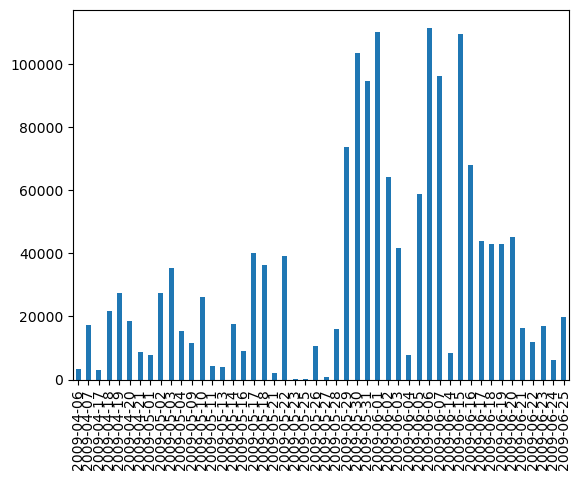

In [21]:
date_counts.plot(kind='bar')
plt.show()

In [23]:
date_range = pd.date_range(start = '2009-04-06',end = '2009-06-25')

In [55]:
df_range = pd.DataFrame({'DATE': date_range})
df_range

,DATE
0,2009-04-06
1,2009-04-07
2,2009-04-08
3,2009-04-09
4,2009-04-10
...,...
76,2009-06-21
77,2009-06-22
78,2009-06-23
79,2009-06-24


In [63]:
df_range['DATE'] = pd.to_datetime(df_range['DATE']).dt.date
type(df_range['DATE'][0])

datetime.date

In [64]:
df_range = df_range.merge(date_counts, how='left', on='DATE')
df_range

,DATE,Count
0,2009-04-06,3359.0
1,2009-04-07,17311.0
2,2009-04-08,NaN
3,2009-04-09,NaN
4,2009-04-10,NaN
...,...,...
76,2009-06-21,16360.0
77,2009-06-22,12009.0
78,2009-06-23,17002.0
79,2009-06-24,6299.0


In [65]:
df_range.fillna(0, inplace=True)
df_range

,DATE,Count
0,2009-04-06,3359.0
1,2009-04-07,17311.0
2,2009-04-08,0.0
3,2009-04-09,0.0
4,2009-04-10,0.0
...,...,...
76,2009-06-21,16360.0
77,2009-06-22,12009.0
78,2009-06-23,17002.0
79,2009-06-24,6299.0


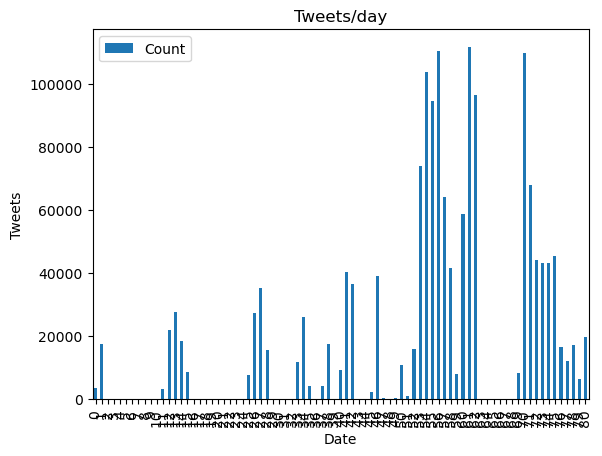

In [69]:
df_range.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Tweets/day')
plt.show()

this is quite a lopsided dataset. there are a very large number of missing days(33) and not that many days(81), so to get the average sentiment for each day would not provide all that many data points. Imputation methods would be of use, but they would definitely be limited in terms of accuracy.

In [72]:
df['text'].isna().sum()

0

### investigate the hourly tweet profile


In [83]:
hour_counts = df['HOUR'].value_counts().sort_index()
hour_counts = pd.DataFrame(hour_counts).reset_index()
hour_counts.columns =['HOUR','Count']
hour_counts

,HOUR,Count
0,2009-04-06 22,1352
1,2009-04-06 23,2007
2,2009-04-07 00,1940
3,2009-04-07 01,1950
4,2009-04-07 02,1892
...,...,...
588,2009-06-25 06,2055
589,2009-06-25 07,2122
590,2009-06-25 08,1974
591,2009-06-25 09,2076


In [92]:
type(hour_counts['HOUR'][0])

str

In [101]:
hour_counts['HOUR']=pd.to_datetime(hour_counts['HOUR'], format='%Y-%m-%d %H')
hour_counts

,HOUR,Count
0,2009-04-06 22:00:00,1352
1,2009-04-06 23:00:00,2007
2,2009-04-07 00:00:00,1940
3,2009-04-07 01:00:00,1950
4,2009-04-07 02:00:00,1892
...,...,...
588,2009-06-25 06:00:00,2055
589,2009-06-25 07:00:00,2122
590,2009-06-25 08:00:00,1974
591,2009-06-25 09:00:00,2076


In [102]:
# hour_counts['HOUR'].dt.strftime('%Y-%m-%d %H')
type(hour_counts['HOUR'][0])

pandas._libs.tslibs.timestamps.Timestamp

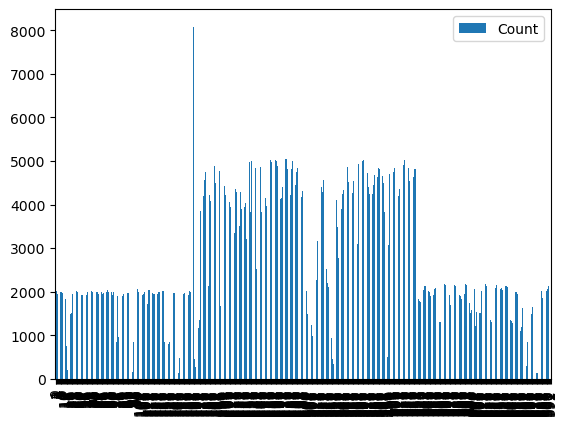

In [85]:
hour_counts.plot(kind='bar')
plt.show()

In [73]:
df['HOUR'] = df['date'].dt.strftime('%Y-%m-%d %H')

In [79]:
df['HOUR'].unique()

array(['2009-04-06 22', '2009-04-06 23', '2009-04-07 00', '2009-04-07 01',
       '2009-04-07 02', '2009-04-07 03', '2009-04-07 04', '2009-04-07 05',
       '2009-04-07 06', '2009-04-07 07', '2009-04-07 08', '2009-04-17 20',
       '2009-04-17 21', '2009-04-17 22', '2009-04-18 06', '2009-04-18 07',
       '2009-04-18 08', '2009-04-18 09', '2009-04-18 10', '2009-04-18 13',
       '2009-04-18 14', '2009-04-18 15', '2009-04-18 16', '2009-04-18 17',
       '2009-04-18 20', '2009-04-18 21', '2009-04-18 22', '2009-04-18 23',
       '2009-04-19 00', '2009-04-19 01', '2009-04-19 02', '2009-04-19 03',
       '2009-04-19 04', '2009-04-19 05', '2009-04-19 06', '2009-04-19 07',
       '2009-04-19 08', '2009-04-19 09', '2009-04-19 10', '2009-04-19 11',
       '2009-04-19 12', '2009-04-19 19', '2009-04-19 22', '2009-04-19 23',
       '2009-04-20 00', '2009-04-20 01', '2009-04-20 02', '2009-04-20 03',
       '2009-04-20 04', '2009-04-20 05', '2009-04-20 06', '2009-04-20 07',
       '2009-04-20 08', '

In [78]:
df['HOUR'].nunique()

593

81 days with 34 or ~40% missing. 81*24 hrs~1944 so 593/1944 or 70% missing. 

### Hour range

In [80]:
hour_range = pd.date_range(start = '2009-04-06 00:00:00',end = '2009-06-25 00:00:00', freq = 'H')
hour_range

DatetimeIndex(['2009-04-06 00:00:00', '2009-04-06 01:00:00',
               '2009-04-06 02:00:00', '2009-04-06 03:00:00',
               '2009-04-06 04:00:00', '2009-04-06 05:00:00',
               '2009-04-06 06:00:00', '2009-04-06 07:00:00',
               '2009-04-06 08:00:00', '2009-04-06 09:00:00',
               ...
               '2009-06-24 15:00:00', '2009-06-24 16:00:00',
               '2009-06-24 17:00:00', '2009-06-24 18:00:00',
               '2009-06-24 19:00:00', '2009-06-24 20:00:00',
               '2009-06-24 21:00:00', '2009-06-24 22:00:00',
               '2009-06-24 23:00:00', '2009-06-25 00:00:00'],
              dtype='datetime64[ns]', length=1921, freq='H')

In [90]:
df_hour = pd.DataFrame({'HOUR': hour_range})
df_hour

,HOUR
0,2009-04-06 00:00:00
1,2009-04-06 01:00:00
2,2009-04-06 02:00:00
3,2009-04-06 03:00:00
4,2009-04-06 04:00:00
...,...
1916,2009-06-24 20:00:00
1917,2009-06-24 21:00:00
1918,2009-06-24 22:00:00
1919,2009-06-24 23:00:00


In [91]:
type(df_hour['HOUR'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [88]:
# df_hour['HOUR'] = pd.to_datetime(df_hour['HOUR']).dt.strftime('%Y-%m-%d %H')

In [104]:
hour_range = df_hour.merge(hour_counts, how='left', on='HOUR')
hour_range

,HOUR,Count
0,2009-04-06 00:00:00,NaN
1,2009-04-06 01:00:00,NaN
2,2009-04-06 02:00:00,NaN
3,2009-04-06 03:00:00,NaN
4,2009-04-06 04:00:00,NaN
...,...,...
1916,2009-06-24 20:00:00,99.0
1917,2009-06-24 21:00:00,2105.0
1918,2009-06-24 22:00:00,2087.0
1919,2009-06-24 23:00:00,2008.0


In [105]:
hour_range.fillna(0, inplace=True)

In [107]:
hour_range

,HOUR,Count
0,2009-04-06 00:00:00,0.0
1,2009-04-06 01:00:00,0.0
2,2009-04-06 02:00:00,0.0
3,2009-04-06 03:00:00,0.0
4,2009-04-06 04:00:00,0.0
...,...,...
1916,2009-06-24 20:00:00,99.0
1917,2009-06-24 21:00:00,2105.0
1918,2009-06-24 22:00:00,2087.0
1919,2009-06-24 23:00:00,2008.0


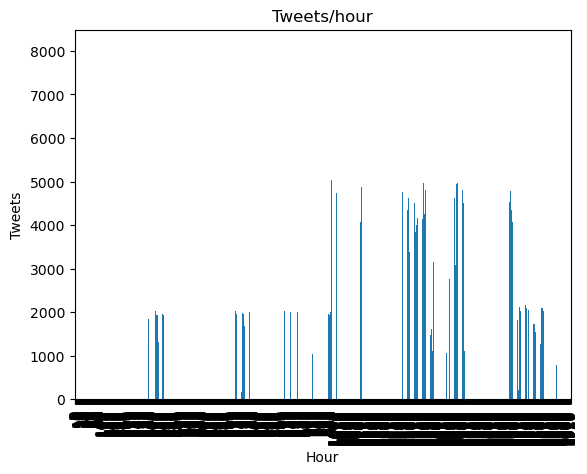

In [109]:
hour_range['Count'].plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Tweets')
plt.title('Tweets/hour')
plt.show()

In [115]:
sample = hour_range.iloc[600:700]

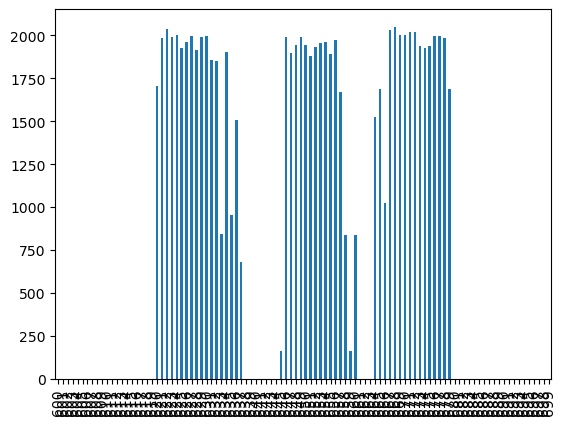

In [116]:
sample['Count'].plot(kind='bar')
plt.show()

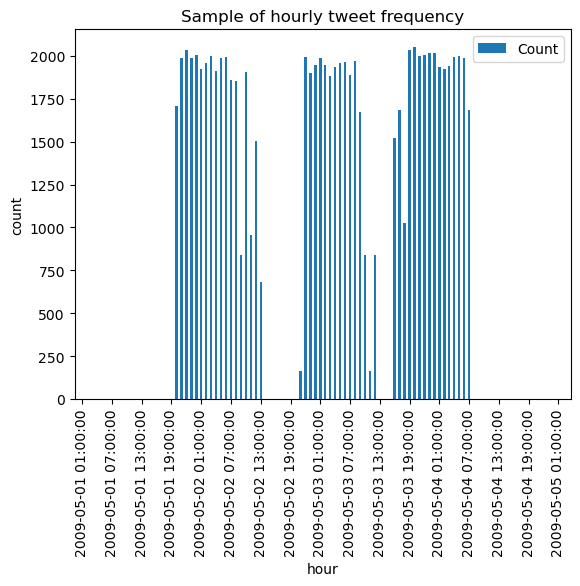

In [123]:
X ='HOUR'
Y = 'Count'
sample.plot(x = X, y = Y, kind='bar')

# Set custom axis labels for the x-axis (every 6th value)
x_ticks = range(1, len(sample) + 1, 6)
plt.xticks(x_ticks, sample['HOUR'].iloc[x_ticks])

# Add labels and title
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Sample of hourly tweet frequency')
plt.show()

In [133]:
def zoom(start,end,hours):
    sample = hour_range.iloc[start:end]
    X ='HOUR'
    Y = 'Count'
    sample.plot(x = X, y = Y, kind='bar')

    x_ticks = range(1, len(sample) + 1, hours)
    plt.xticks(x_ticks, sample['HOUR'].iloc[x_ticks])

    plt.xlabel('Date & Hour')
    plt.ylabel('Tweet count')
    plt.title('Sample of hourly tweet frequency')
    plt.show()
    return 0

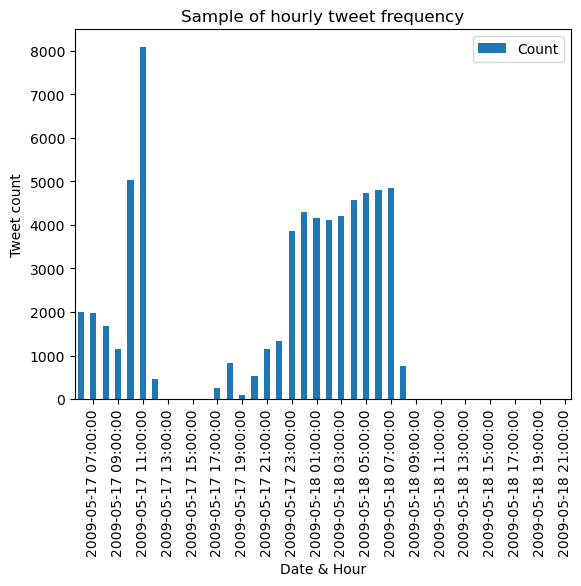

0

In [137]:
zoom(990,1030,2)

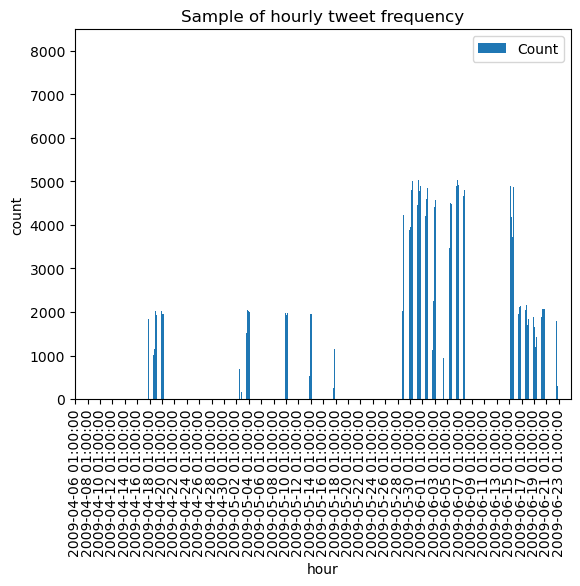

0

In [132]:
zoom(0,1920,48)